In [77]:
from torchvision import datasets
from PIL import Image
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from skimage.filters import gabor
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from ipywidgets import IntProgress
from IPython.display import display
import random
%matplotlib inline

## EDA

### Grey scale images

In [78]:
def grey(image):
    plt.figure(figsize=(15,4))
    img = cv2.imread(image,0)
    plt.imshow(img)

#### C1 Grey scale
Converting to grayscale can expose the noise in the good data

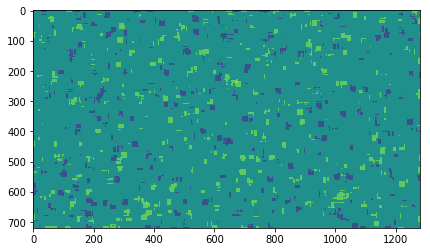

In [79]:
grey('./sample/c1.png')

#### C2 Grey scale
Converting to grayscale smoothens the image and 1 pixel dead count cant be detected

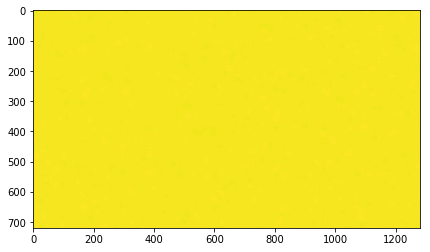

In [80]:
grey('./sample/c2.png')

#### C3 Grey scale
Converting to grayscale able to expose whit dot defect

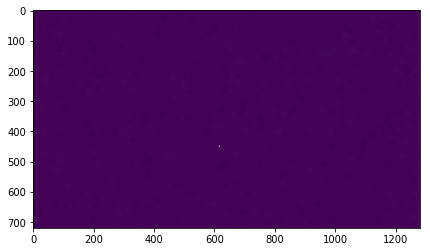

In [81]:
grey('./sample/c3.png')

#### C4 Grey scale
Converting to grayscale able to expose stain pattern well

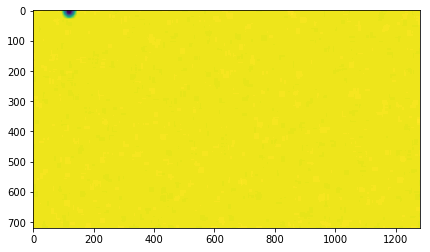

In [82]:
grey('./sample/c4.png')

#### C5 Grey scale
Converting to grayscale can expose the test interface shading clearly

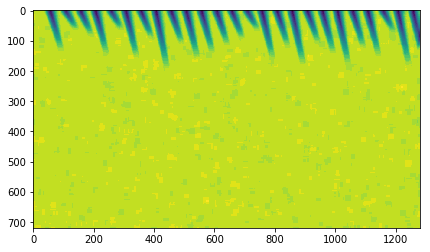

In [83]:
grey('./sample/c5.png')

#### C6 Grey scale
Converting to grayscale can expose the ring stain clearly

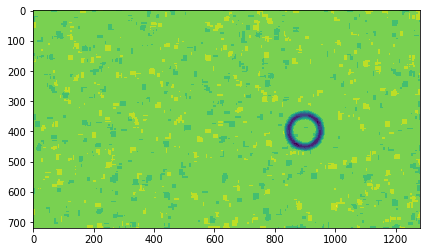

In [84]:
grey('./sample/c6.png')

#### C7 Grey scale
Converting to grayscale can expose the Shift register failure clearly

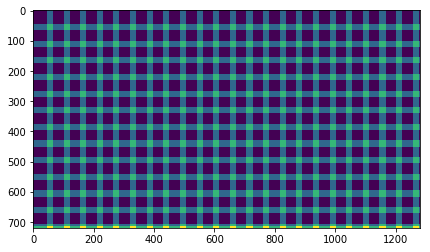

In [85]:
grey('./sample/c7.png')

#### C8 Grey scale
Converting to grayscale can expose the Test light source out of focus clearly

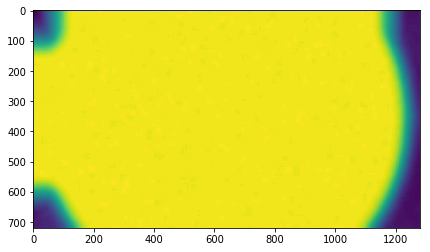

In [86]:
grey('./sample/c8.png')

### Local binary patterns (LBP)
**`Entropy is a statistical measure of randomness that can be used to characterize the texture of the input image.`**

In [89]:
def lbp(image):
    img = cv2.imread(image,0)
    # Finding LBP
    feat_lbp = local_binary_pattern(img,8,2,'uniform') #Radius = 1, No. of neighbours = 8
    feat_lbp = np.uint8((feat_lbp/feat_lbp.max())*255) #Converting to unit8
    lbp_img = Image.fromarray(feat_lbp) #Conversion from array to PIL image
    plt.figure(figsize=(15,4))
    plt.imshow(lbp_img,cmap='gray') #Displaying LBP
    lbp_hist,_ = np.histogram(feat_lbp,8)
    lbp_hist = np.array(lbp_hist,dtype=float)
    lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
    lbp_energy = np.sum(lbp_prob**2)
    lbp_entropy = -np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))
    print('LBP energy = '+str(lbp_energy))
    print('LBP entropy = '+str(lbp_entropy))
    print('LBP histogram = '+str(lbp_hist))

#### C1 LBP Energy and Entropy
Converting to grayscale can expose the Test light source out of focus clearly

LBP energy = 0.8540416761304127
LBP entropy = 0.5158163137337142
LBP histogram = [1.08200e+03 3.70000e+01 6.83800e+03 6.52000e+02 4.66820e+04 7.14900e+03
 8.85400e+03 8.50306e+05]


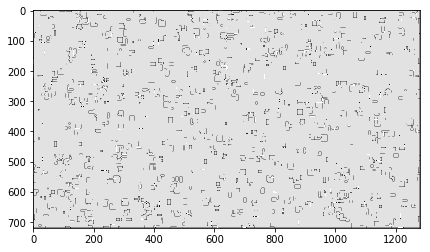

In [90]:
lbp('./sample/c1.png')

#### C2 LBP Energy and Entropy
Converting to grayscale can expose the Test light source out of focus clearly

LBP energy = 0.8480653460891158
LBP entropy = 0.5327721104814872
LBP histogram = [9.7900e+02 5.6000e+01 6.8280e+03 6.9100e+02 4.8726e+04 7.7030e+03
 9.4270e+03 8.4719e+05]


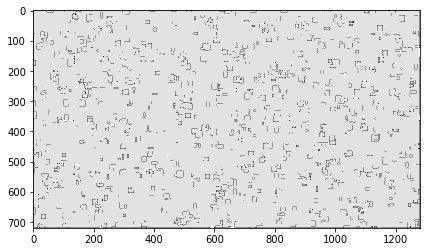

In [20]:
lbp('./sample/c2.png')

#### C3 LBP Energy and Entropy
Converting to grayscale can expose the Test light source out of focus clearly

LBP energy = 0.8554337044916034
LBP entropy = 0.5248156090147631
LBP histogram = [8.13000e+02 3.10000e+02 4.88100e+03 3.50500e+03 4.31290e+04 7.21600e+03
 1.05710e+04 8.51175e+05]


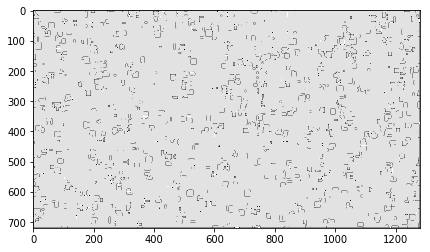

In [21]:
lbp('./sample/c3.png')

#### C4 LBP Energy and Entropy
Converting to grayscale can expose the Test light source out of focus clearly

LBP energy = 0.8480321989530399
LBP entropy = 0.5366771965350189
LBP histogram = [1.08900e+03 3.30000e+01 6.69900e+03 1.60100e+03 4.83870e+04 7.52600e+03
 9.06700e+03 8.47198e+05]


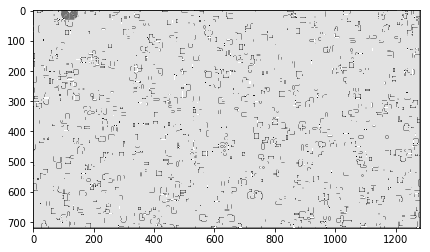

In [22]:
lbp('./sample/c4.png')

#### C5 LBP Energy and Entropy
Converting to grayscale can expose the Test light source out of focus clearly

LBP energy = 0.6867410265039515
LBP entropy = 1.0085746903217812
LBP histogram = [1.16600e+03 1.78000e+02 9.73300e+03 3.43920e+04 9.01350e+04 1.26380e+04
 1.60870e+04 7.57271e+05]


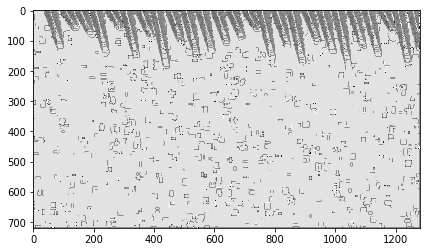

In [23]:
lbp('./sample/c5.png')

#### C6 LBP Energy and Entropy
Converting to grayscale can expose the Test light source out of focus clearly

LBP energy = 0.8332202163107602
LBP entropy = 0.5870378773180253
LBP histogram = [1.12600e+03 4.40000e+01 7.50100e+03 2.95400e+03 5.12100e+04 8.68100e+03
 1.05500e+04 8.39534e+05]


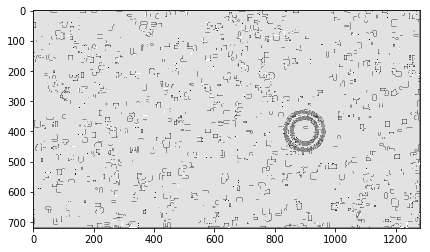

In [24]:
lbp('./sample/c6.png')

#### C7 LBP Energy and Entropy
Converting to grayscale can expose the Test light source out of focus clearly

C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]
C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


LBP energy = 0.745745918669524
LBP entropy = nan
LBP histogram = [  5376.      0.      0. 123500.   6548.      0.      0. 786176.]


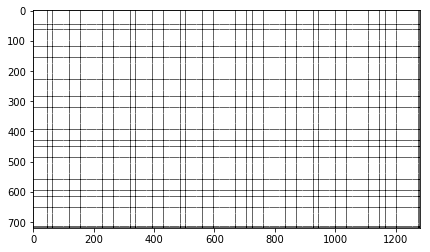

In [25]:
lbp('./sample/c7.png')

#### C8 LBP Energy and Entropy
Converting to grayscale can expose the Test light source out of focus clearly

LBP energy = 0.6751140407138401
LBP entropy = 1.0302865068668838
LBP histogram = [1.06000e+03 1.91000e+02 1.15420e+04 3.59590e+04 9.80870e+04 1.15260e+04
 1.35410e+04 7.49694e+05]


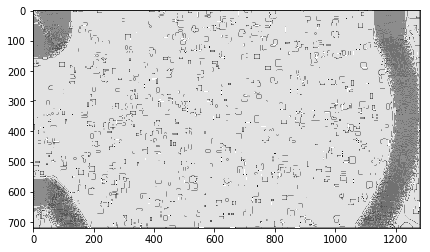

In [26]:
lbp('./sample/c8.png')

### Co-occurance matrix GLCM features

In [27]:
def com(image):
    img = cv2.imread(image,0)
    # Finding GLCM features from co-occurance matrix
    gCoMat = greycomatrix(img, [2], [0],256,symmetric=True, normed=True) # Co-occurance matrix
    contrast = greycoprops(gCoMat, prop='contrast')
    dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
    homogeneity = greycoprops(gCoMat, prop='homogeneity')
    energy = greycoprops(gCoMat, prop='energy')
    correlation = greycoprops(gCoMat, prop='correlation')
    print('Contrast = '+str(contrast[0][0]))
    print('Dissimilarity = '+str(dissimilarity[0][0]))
    print('Homogeneity = '+str(homogeneity[0][0]))
    print('Energy = '+str(energy[0][0]))
    print('Correlation = '+str(correlation[0][0]))
    

#### C1 Co-occurance matrix GLCM features

In [28]:
com('./sample/c1.png')

Contrast = 0.03841723178577639
Dissimilarity = 0.03840853764562685
Homogeneity = 0.9807966005912016
Energy = 0.8856808469516855
Correlation = 0.8025594672217137


#### C2 Co-occurance matrix GLCM features

In [29]:
com('./sample/c2.png')

Contrast = 0.0744294470526865
Dissimilarity = 0.03934424447922101
Homogeneity = 0.9804670928132365
Energy = 0.8813253227485949
Correlation = 0.6889711836418377


#### C3 Co-occurance matrix GLCM features

In [30]:
com('./sample/c3.png')

Contrast = 0.11207507390019127
Dissimilarity = 0.03854873065553817
Homogeneity = 0.9814889117411739
Energy = 0.8841595677349138
Correlation = 0.7137229465519639


#### C4 Co-occurance matrix GLCM features

In [31]:
com('./sample/c4.png')

Contrast = 0.08083050773778475
Dissimilarity = 0.04594092331768388
Homogeneity = 0.9791904066319629
Energy = 0.8786742898392605
Correlation = 0.9849170656928035


#### C5 Co-occurance matrix GLCM features

In [32]:
com('./sample/c5.png')

Contrast = 0.3075943314206225
Dissimilarity = 0.18605025213006432
Homogeneity = 0.9191292818640237
Energy = 0.7775898805084509
Correlation = 0.98121976587834


#### C6 Co-occurance matrix GLCM features

In [33]:
com('./sample/c6.png')

Contrast = 0.045170405146930964
Dissimilarity = 0.04502043122935141
Homogeneity = 0.9775047817770823
Energy = 0.8712323333185508
Correlation = 0.9343407208691425


#### C7 Co-occurance matrix GLCM features

In [34]:
com('./sample/c7.png')

Contrast = 2.591549295774648
Dissimilarity = 0.431924882629108
Homogeneity = 0.9299581271412257
Energy = 0.5851102688982232
Correlation = 0.9246613055490394


#### C8 Co-occurance matrix GLCM features

In [35]:
com('./sample/c8.png')

Contrast = 0.3391149365327769
Dissimilarity = 0.19710485133020345
Homogeneity = 0.9156464348911187
Energy = 0.7556522270263056
Correlation = 0.9995231798006957


### Gabor filter energy and entropy

In [91]:
def gab(image):
    # Gabor filter
    img = cv2.imread(image,0)
    gaborFilt_real,gaborFilt_imag = gabor(img,frequency=0.6)
    gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
    # Displaying the filter response
    fig, ax = plt.subplots(1,2,figsize=(15,15))
    ax[0].imshow(gaborFilt_real,cmap='gray')
    ax[1].imshow(gaborFilt_imag,cmap='gray')
    # Energy and Entropy of Gabor filter response
    gabor_hist,_ = np.histogram(gaborFilt,8)
    gabor_hist = np.array(gabor_hist,dtype=float)
    gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
    gabor_energy = np.sum(gabor_prob**2)
    gabor_entropy = -np.sum(np.multiply(gabor_prob,np.log2(gabor_prob)))
    print('Gabor energy = '+str(gabor_energy))
    print('Gabor entropy = '+str(gabor_entropy))
    

#### C1 Gabor filter Energy and Entropy

C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


Gabor energy = 0.7630358284938483
Gabor entropy = nan


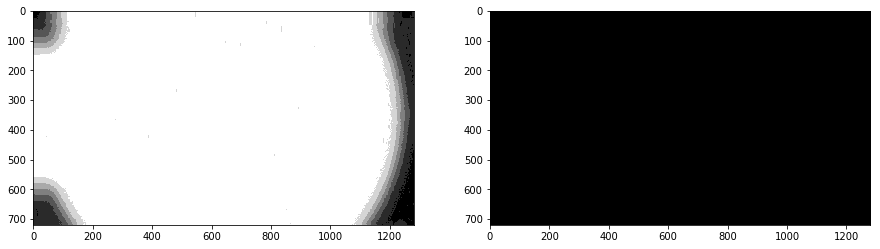

In [92]:
gab(image='./sample/c8.png')

#### C2 Gabor filter Energy and Entropy

C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


Gabor energy = 0.9999674482533962
Gabor entropy = nan


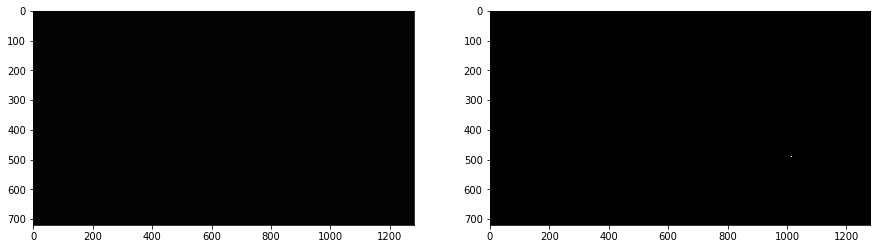

In [84]:
gab(image='./sample/c2.png')

#### C3 Gabor filter Energy and Entropy

C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


Gabor energy = 0.9998632881611953
Gabor entropy = nan


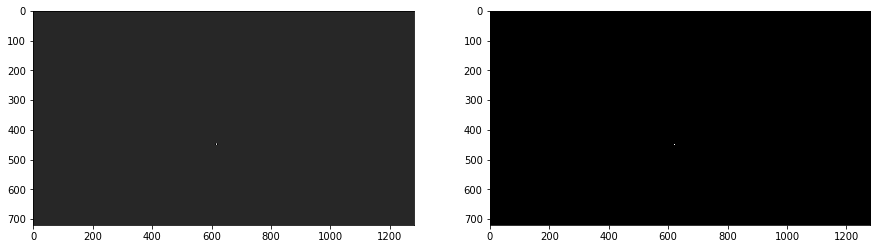

In [85]:
gab(image='./sample/c3.png')

#### C4 Gabor filter Energy and Entropy

C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


Gabor energy = 0.9963238974394623
Gabor entropy = nan


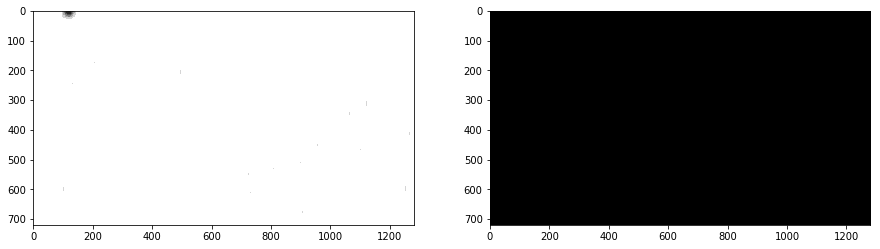

In [86]:
gab(image='./sample/c4.png')

#### C5 Gabor filter Energy and Entropy

C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


Gabor energy = 0.8580431496325833
Gabor entropy = nan


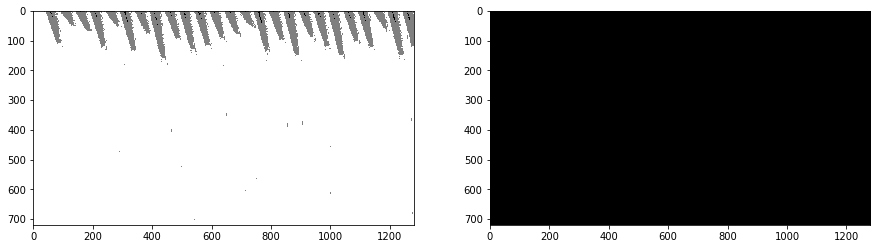

In [87]:
gab(image='./sample/c5.png')

#### C6 Gabor filter Energy and Entropy

C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


Gabor energy = 0.9870703633838231
Gabor entropy = nan


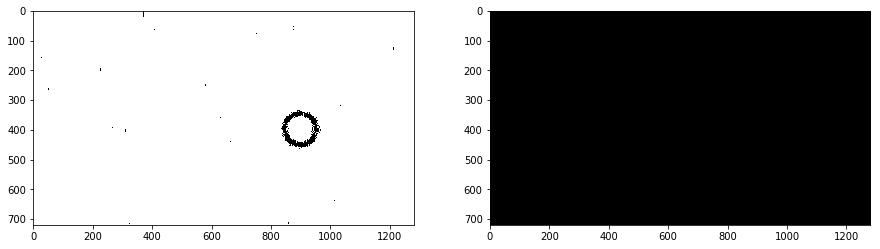

In [88]:
gab(image='./sample/c6.png')

#### C7 Gabor filter Energy and Entropy

C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


Gabor energy = 0.7080507816173411
Gabor entropy = nan


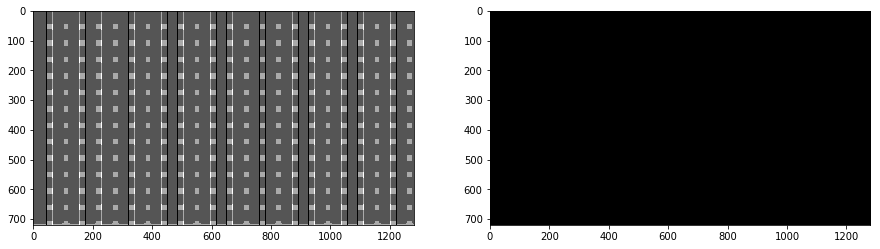

In [89]:
gab(image='./sample/c7.png')

#### C8 Gabor filter Energy and Entropy

C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


Gabor energy = 0.7630358284938483
Gabor entropy = nan


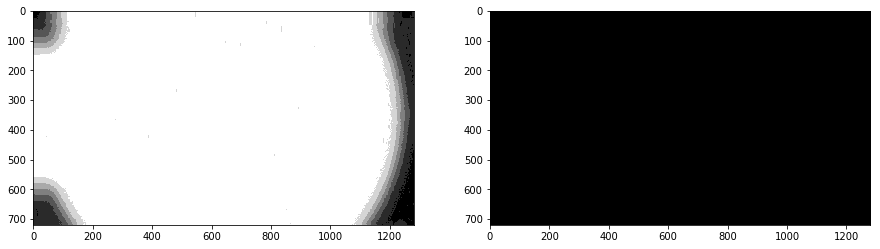

In [90]:
gab(image='./sample/c8.png')

### CV Keypoints descriptors feature

In [91]:
def kp(image):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    orb = cv2.ORB_create(nfeatures=1500)
    keypoints_orb, descriptors = orb.detectAndCompute(img, None)
    print(keypoints_orb)
    #print(descriptors)
    img = cv2.drawKeypoints(img, keypoints_orb, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(15,4))
    plt.imshow(img)

#### C1 CV Keypoints descriptors

[]


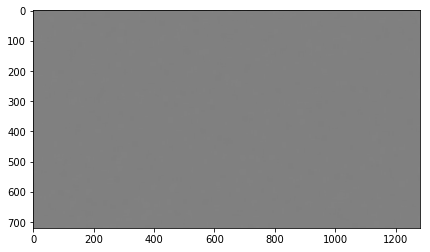

In [92]:
kp('./sample/c1.png')

#### C2 CV Keypoints descriptors

[<KeyPoint 00000162B94157E0>, <KeyPoint 00000162B9415F60>, <KeyPoint 00000162B97C8B10>, <KeyPoint 00000162B97C8F90>]


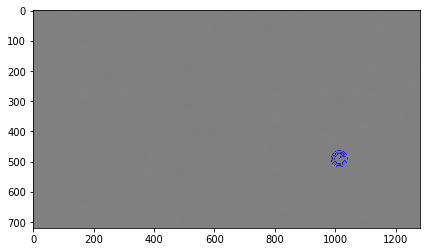

In [94]:
kp('./sample/c2.png')

#### C3 CV Keypoints descriptors

[<KeyPoint 00000162B9415F60>, <KeyPoint 00000162B94157E0>, <KeyPoint 00000162B97C8B10>, <KeyPoint 00000162B97C8C00>, <KeyPoint 00000162B97C8540>, <KeyPoint 00000162BBA709C0>, <KeyPoint 00000162BBA70840>, <KeyPoint 00000162BBA70E70>]


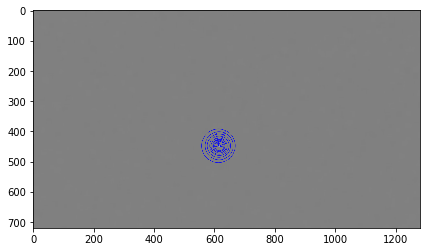

In [95]:
kp('./sample/c3.png')

#### C4 CV Keypoints descriptors

[]


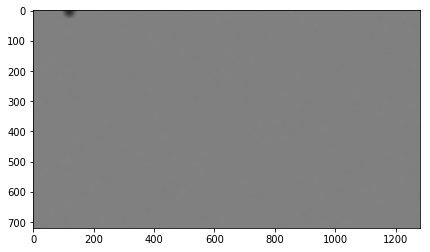

In [96]:
kp('./sample/c4.png')

#### C5 CV Keypoints descriptors

[]


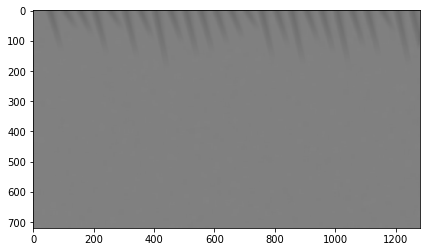

In [97]:
kp('./sample/c5.png')

#### C6 CV Keypoints descriptors

[]


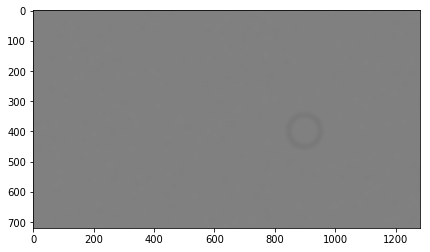

In [98]:
kp('./sample/c6.png')

#### C7 CV Keypoints descriptors

[]


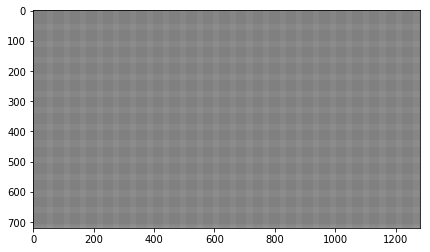

In [99]:
kp('./sample/c7.png')

#### C8 CV Keypoints descriptors

[]


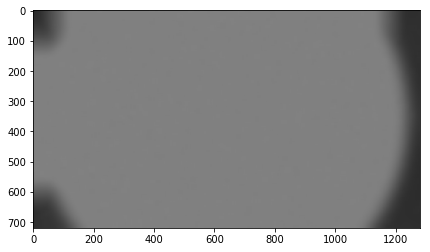

In [100]:
kp('./sample/c8.png')

### Fast Fourier Transform

In [101]:
def fftt(image):
    img = cv2.imread(image,0)
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    plt.figure(figsize=(15,4))
    plt.subplot(121),plt.imshow(img)
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum)
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

#### C1 Fast Fourier Transform

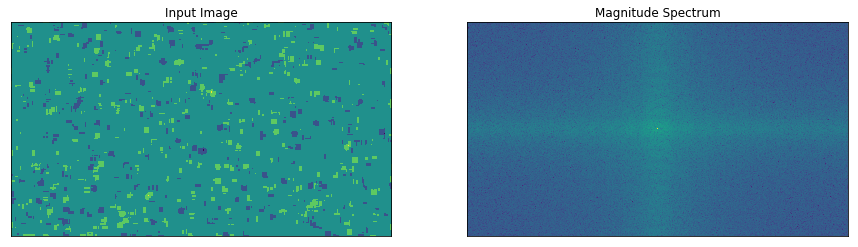

In [102]:
fftt('./sample/c1.png')

#### C2 Fast Fourier Transform

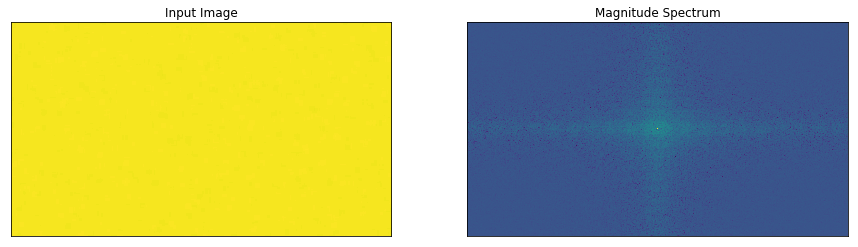

In [109]:
fftt('./sample/c2.png')

#### C3 Fast Fourier Transform

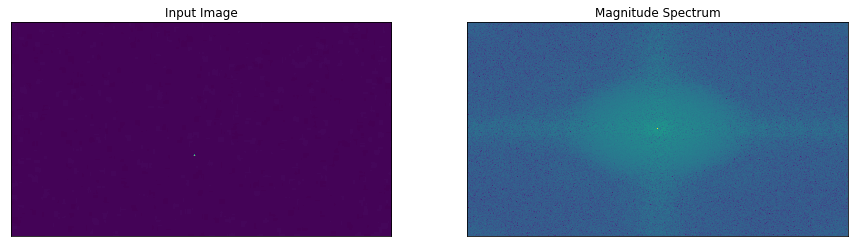

In [108]:
fftt('./sample/c3.png')

#### C4 Fast Fourier Transform

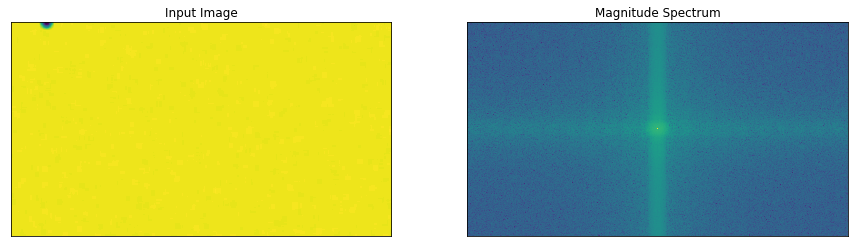

In [107]:
fftt('./sample/c4.png')

#### C5 Fast Fourier Transform

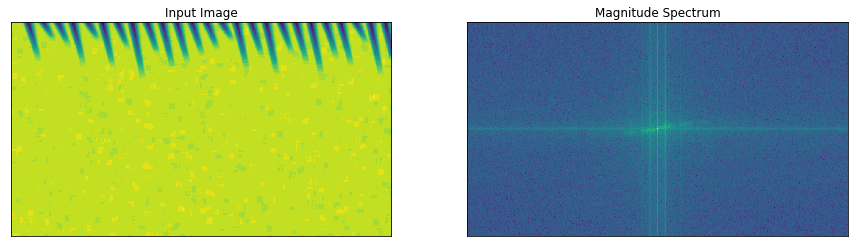

In [106]:
fftt('./sample/c5.png')

#### C6 Fast Fourier Transform

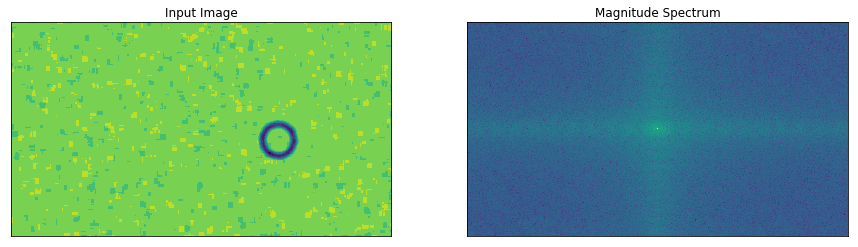

In [105]:
fftt('./sample/c6.png')

#### C7 Fast Fourier Transform

C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


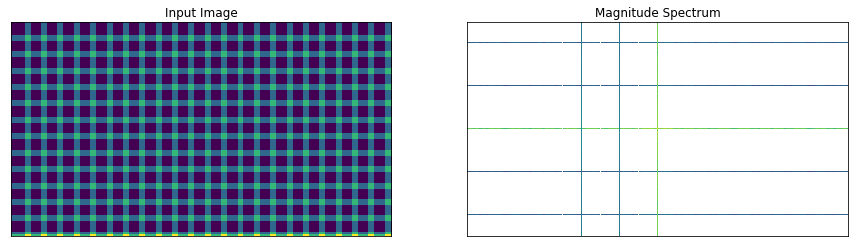

In [104]:
fftt('./sample/c7.png')

#### C8 Fast Fourier Transform

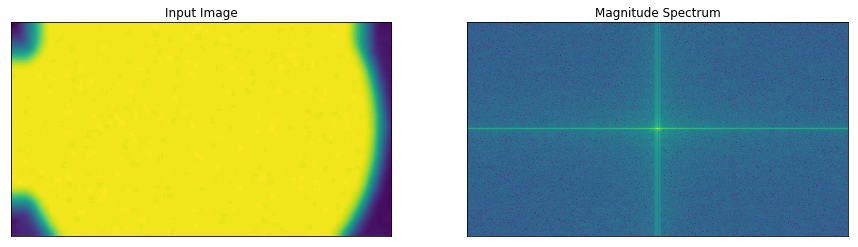

In [103]:
fftt('./sample/c8.png')